In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ["DTD","EuroSAT","GTSRB","MNIST","SVHN","Caltech256"]
nbn = "02_" # Notebook Number; Prefix for artifacts path

In [3]:
ds = "DTD"
df = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
df18 = pd.read_csv(f"../Pred/{ds}_Resnet18.csv")
df50 = pd.read_csv(f"../Pred/{ds}_Resnet50.csv")
df101 = pd.read_csv(f"../Pred/{ds}_Resnet101.csv")
display(df.head(1))
display(df18.head(1))
pred_list = df.columns.to_list()
pred_list.remove("target")
print(pred_list)
for pred_col in pred_list:
    pred = df[pred_col]
    actuals = df["target"]
    # Calculate Accuracy
    curr_acc = np.mean(pred==actuals)
    print(curr_acc)

,pred18,pred50,pred101,target
0,0,0,0,0


,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,...,class_37,class_38,class_39,class_40,class_41,class_42,class_43,class_44,class_45,class_46
0,0.999968,2.555261e-08,5.119607e-08,7.118080e-10,7.628145e-09,7.662358e-08,1.545227e-09,7.464764e-10,1.684754e-09,2.924439e-09,...,1.643800e-09,4.234743e-09,2.808939e-07,7.318567e-10,5.794783e-08,6.770590e-08,4.603307e-09,8.975675e-10,6.455661e-09,1.077164e-07


['pred18', 'pred50', 'pred101']
0.5526595744680851
0.5558510638297872
0.5175531914893617


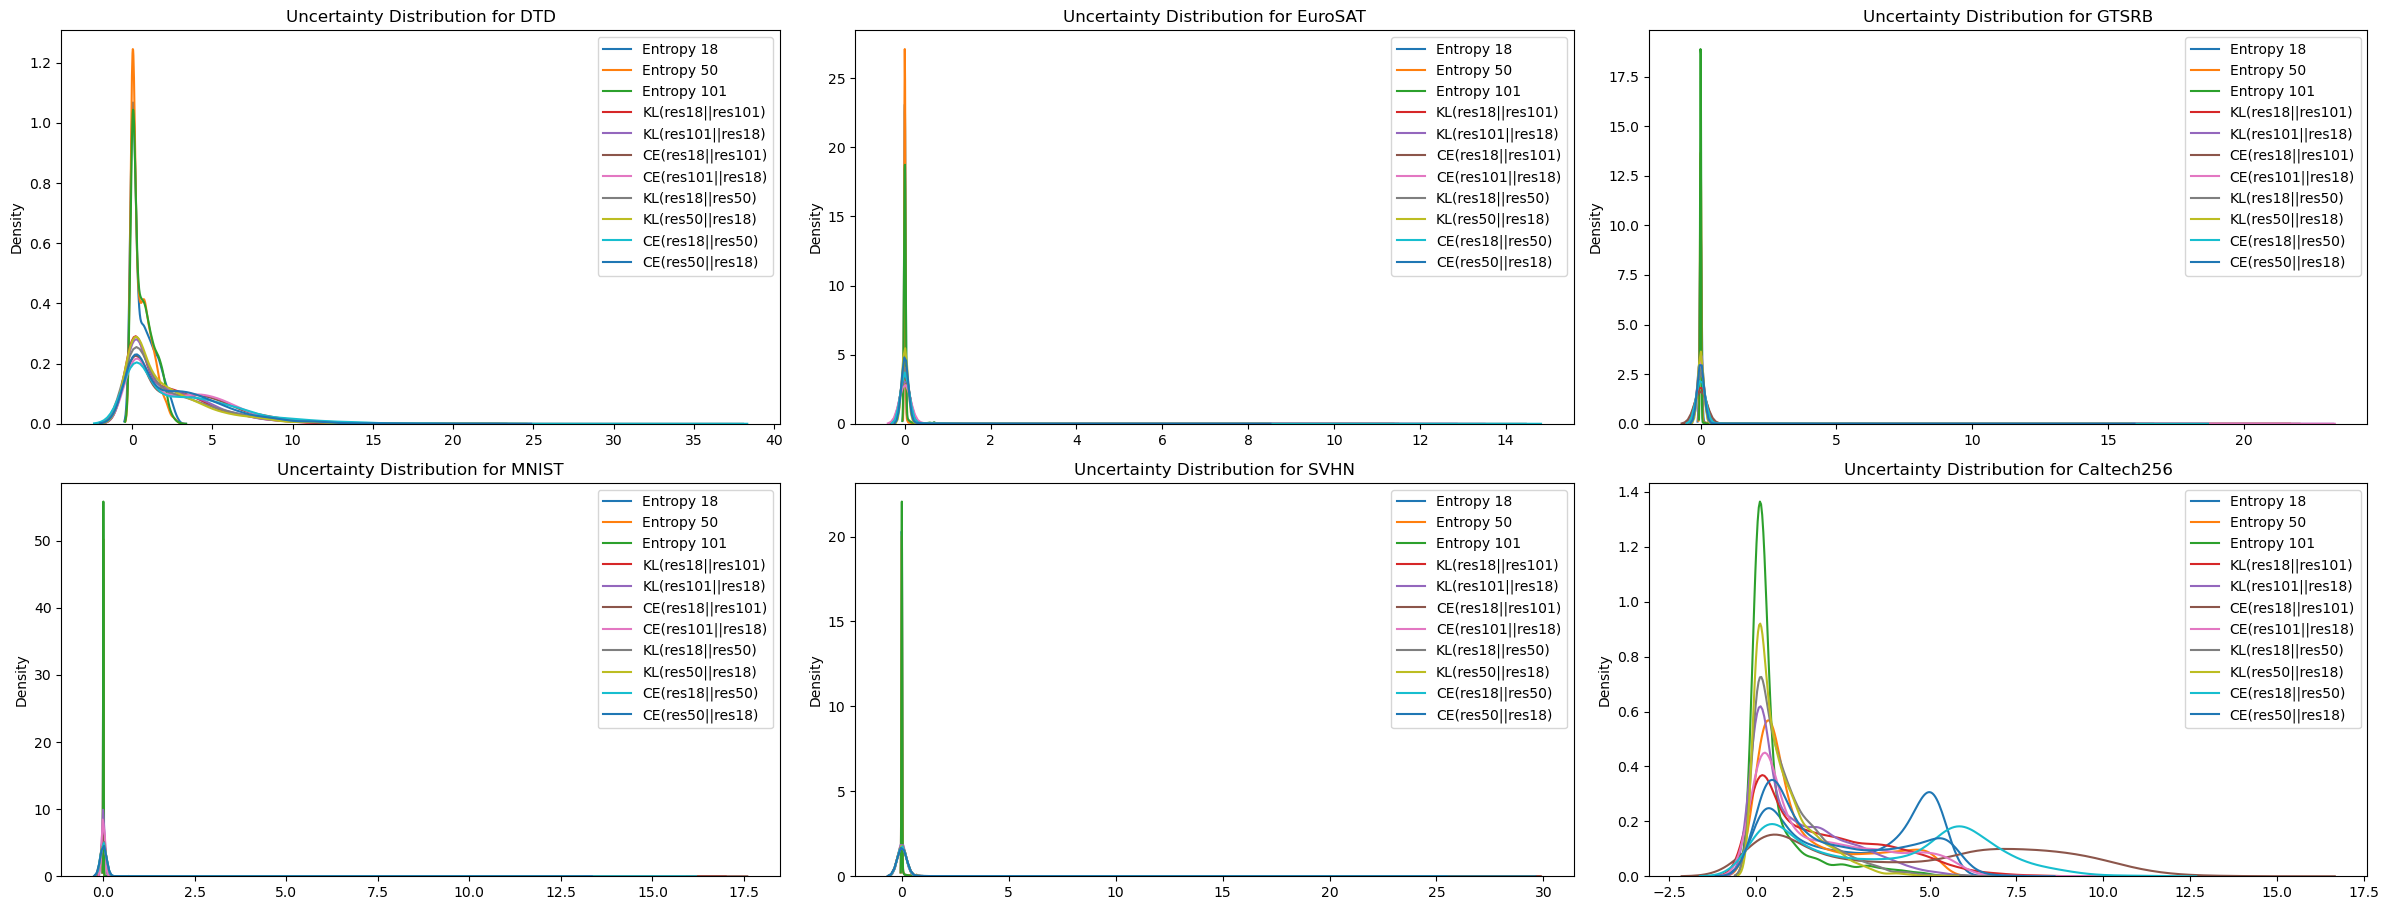

In [4]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(unc_pred["ent_18"], label='Entropy 18', ax=ax)
    sns.kdeplot(unc_pred["ent_50"], label='Entropy 50', ax=ax)
    sns.kdeplot(unc_pred["ent_101"], label='Entropy 101', ax=ax)
    sns.kdeplot(unc_pred["kl_18_101"], label='KL(res18||res101)', ax=ax)
    sns.kdeplot(unc_pred["kl_101_18"], label='KL(res101||res18)', ax=ax)
    sns.kdeplot(unc_pred["ce_18_101"], label='CE(res18||res101)', ax=ax)
    sns.kdeplot(unc_pred["ce_101_18"], label='CE(res101||res18)', ax=ax)
    sns.kdeplot(unc_pred["kl_18_50"], label='KL(res18||res50)', ax=ax)
    sns.kdeplot(unc_pred["kl_50_18"], label='KL(res50||res18)', ax=ax)
    sns.kdeplot(unc_pred["ce_18_50"], label='CE(res18||res50)', ax=ax)
    sns.kdeplot(unc_pred["ce_50_18"], label='CE(res50||res18)', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(f"artifacts/{nbn}uncertainty_distributions.png")

plt.show()

/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tim

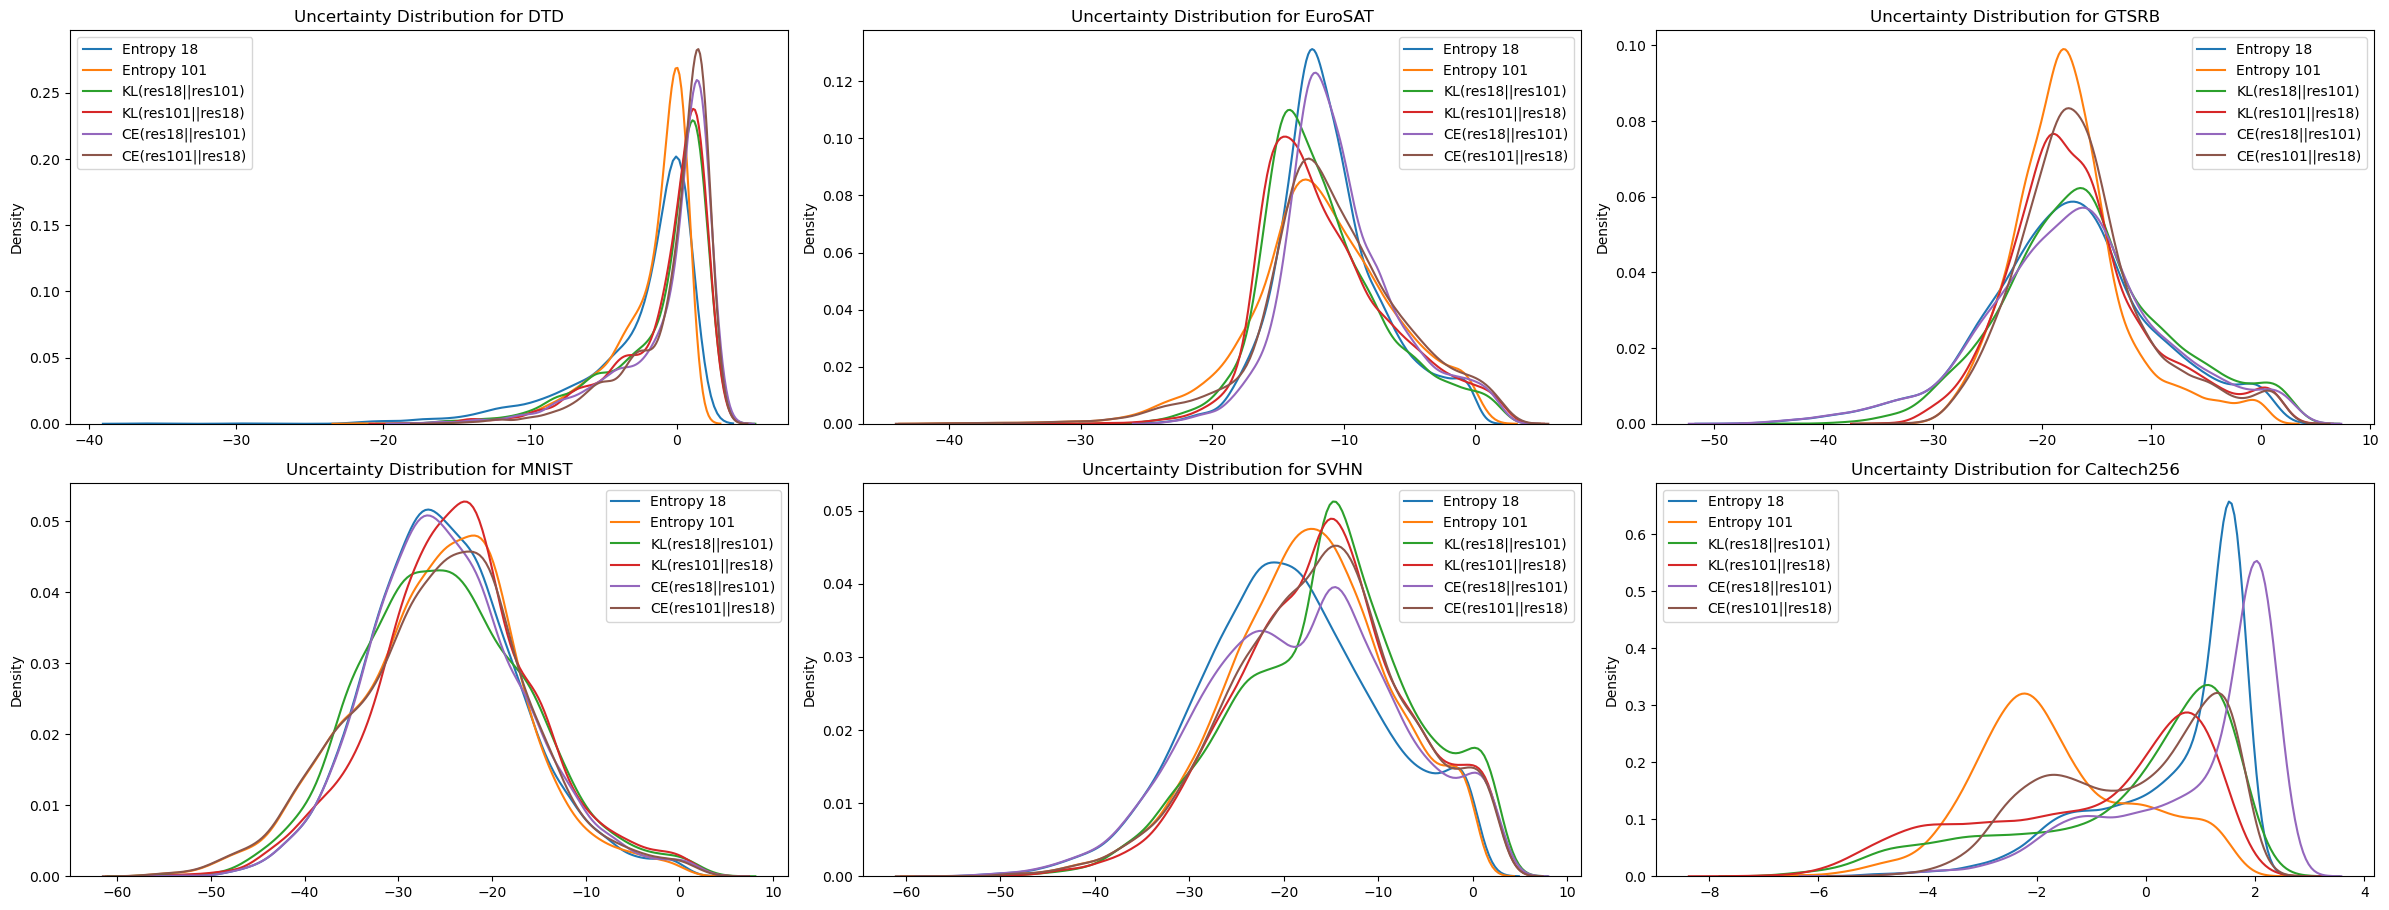

In [5]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(np.log(unc_pred["ent_18"]), label='Entropy 18', ax=ax)
    sns.kdeplot(np.log(unc_pred["ent_101"]), label='Entropy 101', ax=ax)
    sns.kdeplot(np.log(unc_pred["kl_18_101"]), label='KL(res18||res101)', ax=ax)
    sns.kdeplot(np.log(unc_pred["kl_101_18"]), label='KL(res101||res18)', ax=ax)
    sns.kdeplot(np.log(unc_pred["ce_18_101"]), label='CE(res18||res101)', ax=ax)
    sns.kdeplot(np.log(unc_pred["ce_101_18"]), label='CE(res101||res18)', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(f"artifacts/{nbn}log_uncertainty_distributions.png")

plt.show()

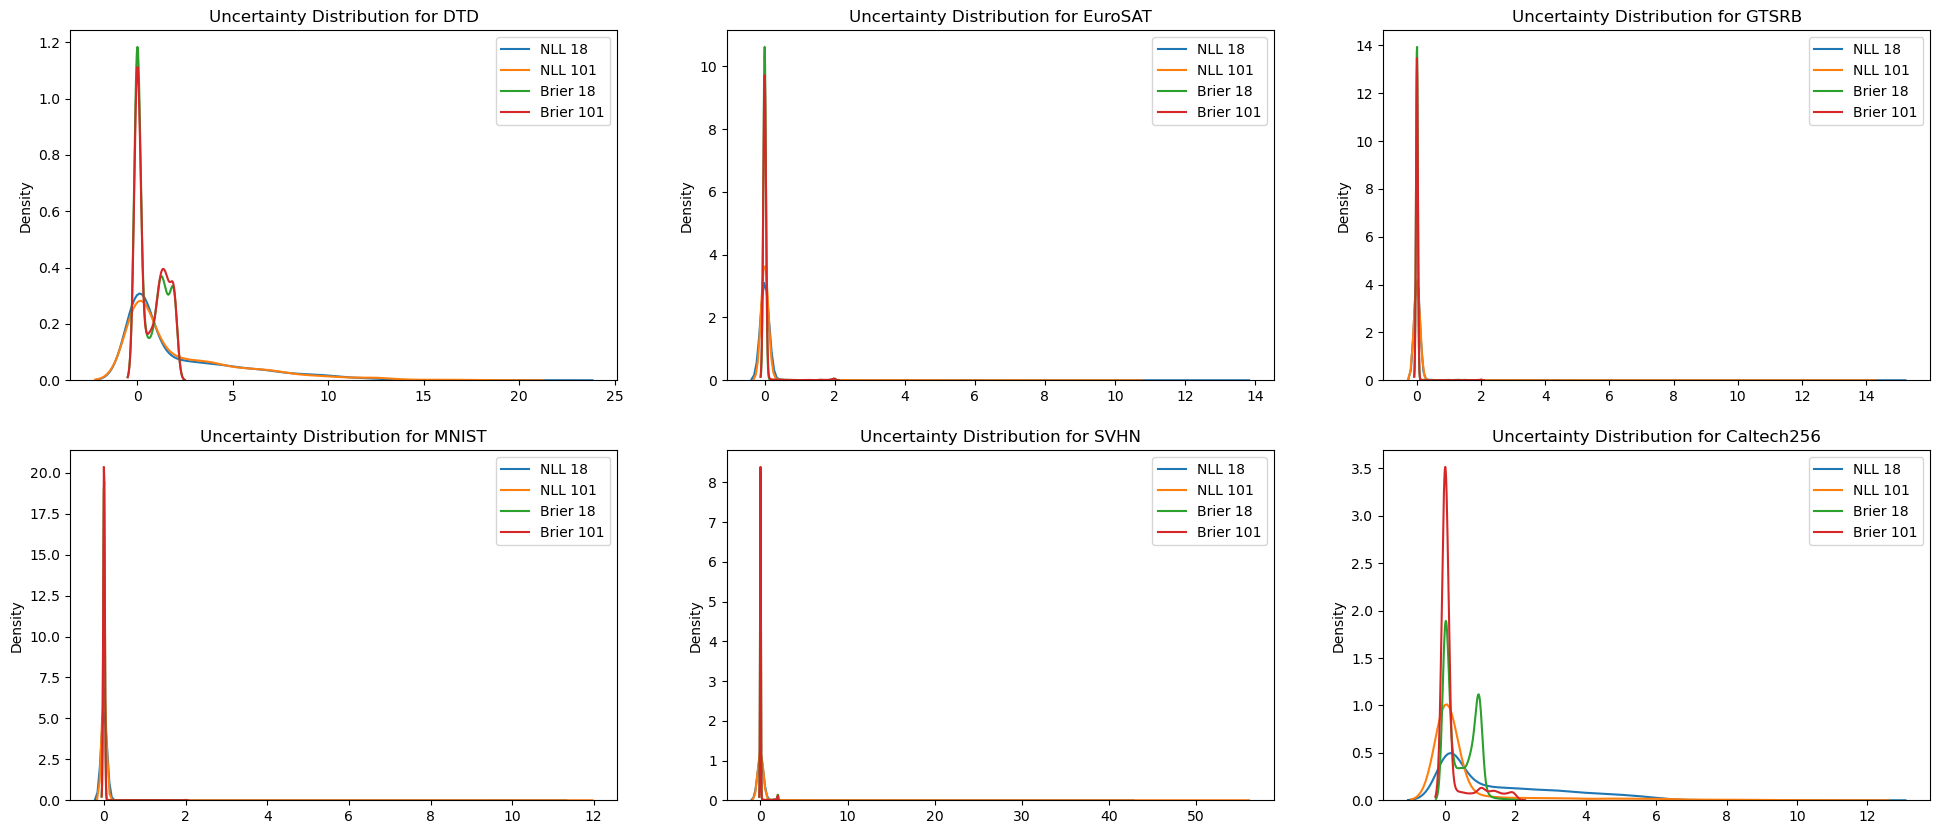

In [6]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(unc_pred["nll_18"], label='NLL 18', ax=ax)
    sns.kdeplot(unc_pred["nll_101"], label='NLL 101', ax=ax)
    sns.kdeplot(unc_pred["brier_18"], label='Brier 18', ax=ax)
    sns.kdeplot(unc_pred["brier_101"], label='Brier 101', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.savefig(f"artifacts/{nbn}nll_brier_distributions.png")

plt.show()

/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/User

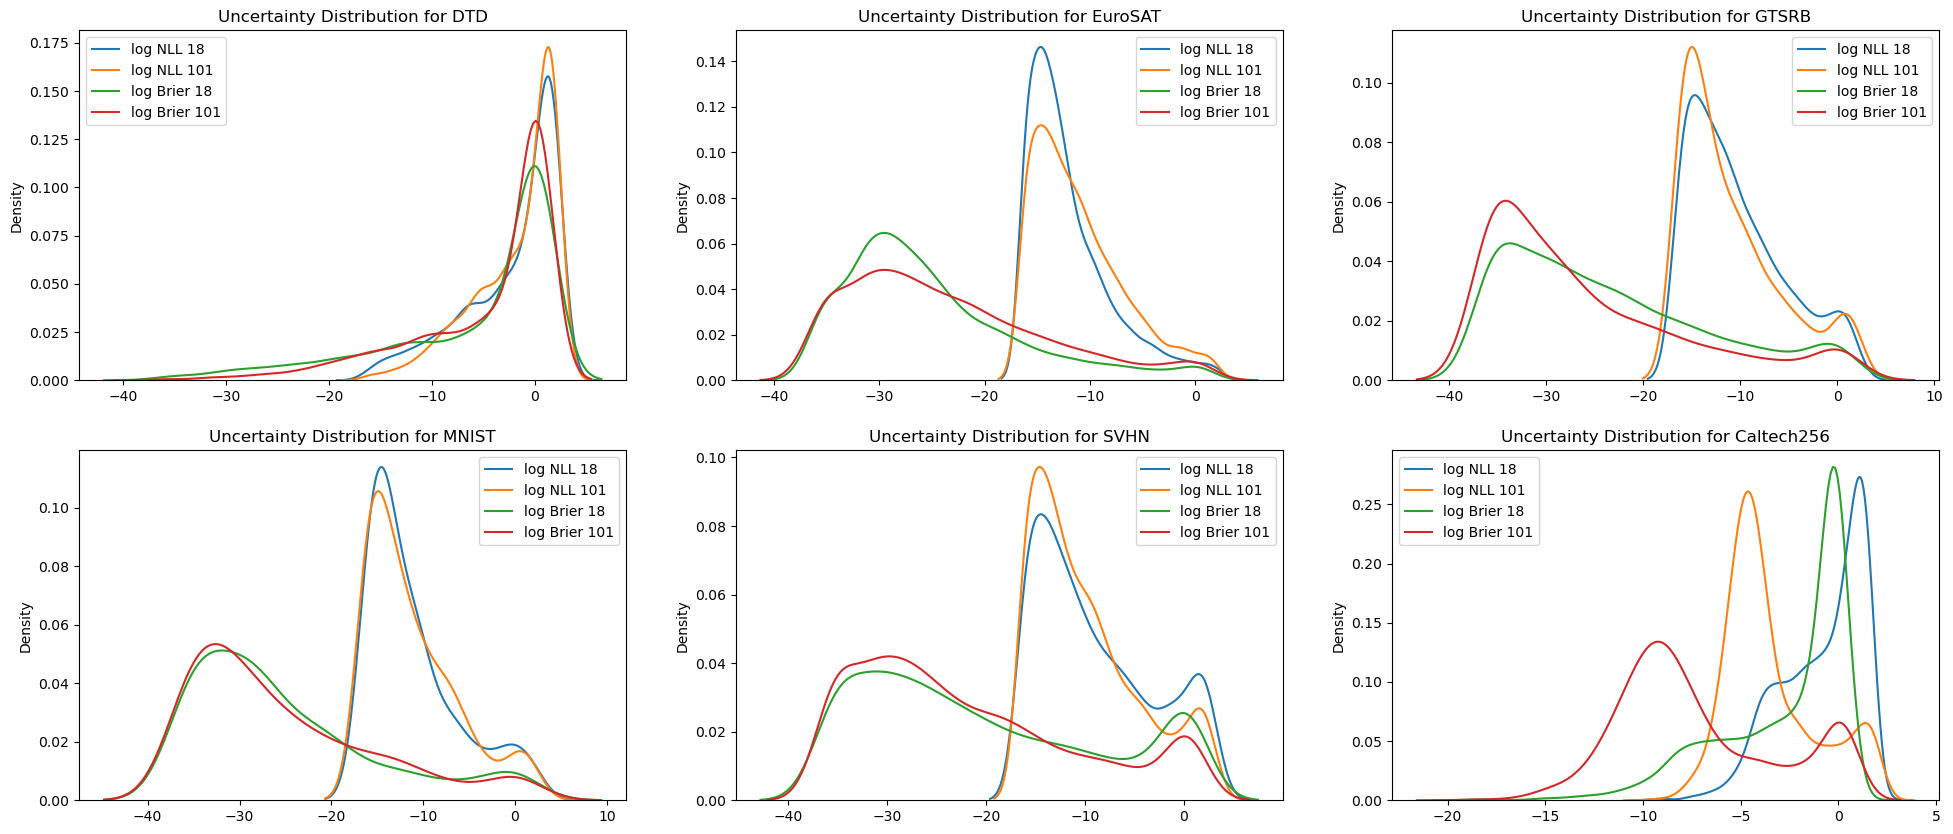

In [7]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(np.log(unc_pred["nll_18"]), label='log NLL 18', ax=ax)
    sns.kdeplot(np.log(unc_pred["nll_101"]), label='log NLL 101', ax=ax)
    sns.kdeplot(np.log(unc_pred["brier_18"]), label='log Brier 18', ax=ax)
    sns.kdeplot(np.log(unc_pred["brier_101"]), label='log Brier 101', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.savefig(f"artifacts/{nbn}log_nll_brier_distributions.png")

plt.show()